In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_Of_Ownership,...,Hourly,min_salary,max_salary,average_salary,job_state,age_of_company,python_jd,spark_jd,excel,aws
0,Data Scientist,80 - 186,We are looking for a Data Scientist to analyze...,-1.0,Dealsrevolution,Remote,-1,-1,-1,-1,...,0,80,186,133.0,-1,-1,0,0,0,0
1,Data Scientist,75 - 120,Has it ever occurred to you that as the Intern...,-1.0,ForMotiv,Remote,-1,1 to 50 Employees,-1,Company - Private,...,0,75,120,97.5,-1,-1,0,0,0,0
2,Data Scientist,38 - 43,We are looking for a Data Scientist to analyze...,4.1,Software Merchant Inc.,Remote,-1,51 to 200 Employees,-1,Company - Private,...,1,38,43,40.5,-1,-1,0,0,0,0
3,Data Scientist,80 - 100,Data Scientist\nCome join a growing financial ...,4.2,"Continental Finance Company, LLC","Wilmington, DE",-1,51 to 200 Employees,2005,Company - Private,...,0,80,100,90.0,DE,15,0,0,0,0
4,Data Scientist,120 - 180,Requires a minimum US Top Security Clearance w...,-1.0,AUGR LLC,"Bethesda, MD",-1,-1,-1,-1,...,0,120,180,150.0,MD,-1,0,0,0,0


In [6]:
df.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_Of_Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'average_salary', 'job_state',
       'age_of_company', 'python_jd', 'spark_jd', 'excel', 'aws'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [9]:
df['job_simp'] = df['Job_Title'].apply(title_simplifier)

In [10]:
df.job_simp.value_counts()

data scientist    121
na                  8
mle                 5
Name: job_simp, dtype: int64

In [12]:
df['seniority'] = df['Job_Title'].apply(seniority)
df.seniority.value_counts()

na        115
senior     18
jr          1
Name: seniority, dtype: int64

In [13]:
df.job_state.value_counts()

-1     25
 CA    18
 DC    16
 IL    13
 NY    12
 VA    11
 WA     6
 MD     6
 NJ     5
 OR     4
 MA     3
 ME     2
 MO     2
 WI     2
 NC     2
 DE     2
 OH     1
 GA     1
 IA     1
 TX     1
 PA     1
Name: job_state, dtype: int64

In [15]:
#  Job description length 
df['desc_len'] = df['Job_Description'].apply(lambda x: len(x))
df['desc_len']


0       796
1      1262
2       406
3      1027
4      1334
       ... 
129     482
130    1217
131     971
132     973
133     606
Name: desc_len, Length: 134, dtype: int64

In [20]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.Hourly ==1 else x.max_salary, axis =1)

In [22]:

df[df.Hourly ==1][['Hourly','min_salary','max_salary']]


,Hourly,min_salary,max_salary
2,1,76,86
8,1,126,0
9,1,142,154


In [23]:
df.Company_Name


0                       Dealsrevolution
1                              ForMotiv
2                Software Merchant Inc.
3      Continental Finance Company, LLC
4                              AUGR LLC
                     ...               
129               Hitachi Solutions Ltd
130                  Affinity Solutions
131           Clarify Health Solutions.
132                         One Concern
133                              Brulis
Name: Company_Name, Length: 134, dtype: object

In [24]:
df.describe()

,Rating,Headquarters,Founded,Competitors,Hourly,min_salary,max_salary,average_salary,age_of_company,python_jd,spark_jd,excel,aws,desc_len
count,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,3.503731,-1.0,1660.902985,-1.0,0.022388,95.820896,123.231343,108.436567,42.216418,0.074627,0.007463,0.119403,0.044776,1224.007463
std,1.413916,0.0,720.398051,0.0,0.148497,27.235219,79.297850,42.666235,46.758596,0.263774,0.086387,0.325479,0.207588,711.253891
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,64.000000,0.000000,31.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,189.000000
25%,3.600000,-1.0,1913.000000,-1.0,0.000000,75.000000,81.500000,74.250000,6.750000,0.000000,0.000000,0.000000,0.000000,818.750000
50%,3.800000,-1.0,1976.000000,-1.0,0.000000,80.000000,137.000000,94.250000,28.000000,0.000000,0.000000,0.000000,0.000000,1024.000000
75%,4.200000,-1.0,1997.000000,-1.0,0.000000,120.000000,180.000000,139.000000,57.000000,0.000000,0.000000,0.000000,0.000000,1314.250000
max,5.000000,-1.0,2018.000000,-1.0,1.000000,250.000000,450.000000,350.000000,228.000000,1.000000,1.000000,1.000000,1.000000,4254.000000


<AxesSubplot:>

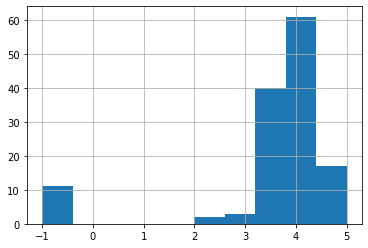

In [25]:
df.Rating.hist()

<AxesSubplot:>

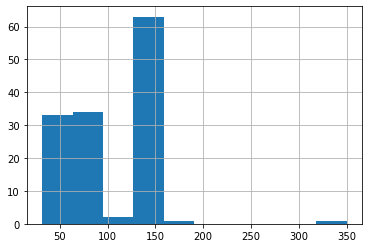

In [26]:
df.average_salary.hist()

<AxesSubplot:>

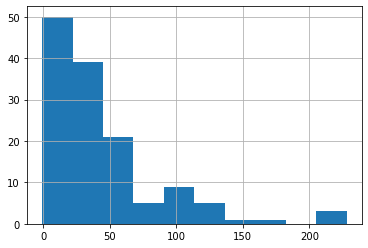

In [27]:
df.age_of_company.hist()

<AxesSubplot:>

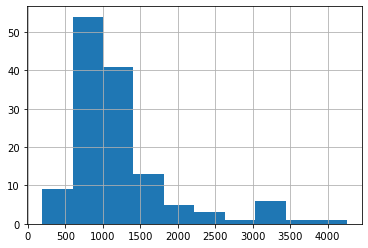

In [29]:
df.desc_len.hist()

<AxesSubplot:>

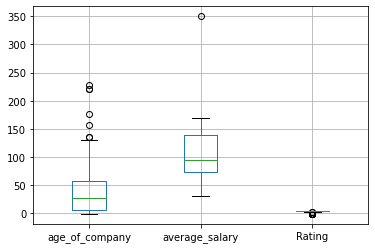

In [31]:

df.boxplot(column = ['age_of_company','average_salary','Rating'])

<AxesSubplot:>

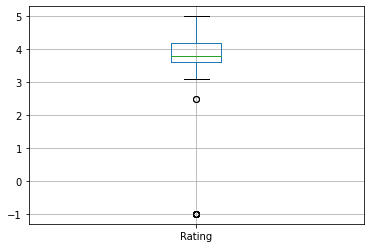

In [32]:
df.boxplot(column = 'Rating')

In [34]:
df[['age_of_company','average_salary','Rating','desc_len']].corr()

,age_of_company,average_salary,Rating,desc_len
age_of_company,1.000000,-0.036064,0.219924,0.216346
average_salary,-0.036064,1.000000,-0.048298,0.000306
Rating,0.219924,-0.048298,1.000000,0.022908
desc_len,0.216346,0.000306,0.022908,1.000000


<AxesSubplot:>

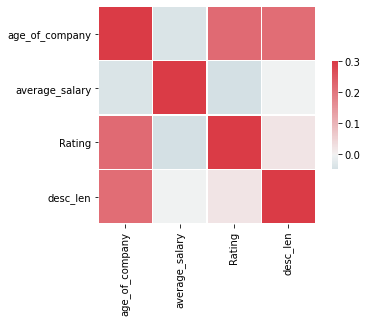

In [35]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age_of_company','average_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
df.columns  

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_Of_Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'average_salary', 'job_state',
       'age_of_company', 'python_jd', 'spark_jd', 'excel', 'aws', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [40]:
 df_cat = df[['Location', 'Size','Type_Of_Ownership', 'Industry', 'Sector', 'Revenue', 'Company_Name', 'job_state', 'python_jd',
       'spark_jd', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 20


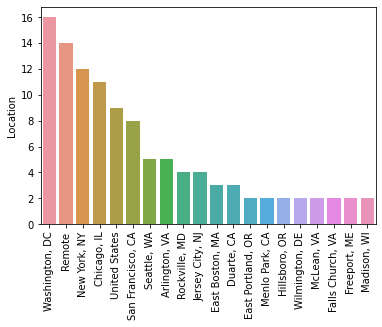

graph for Size: total = 9


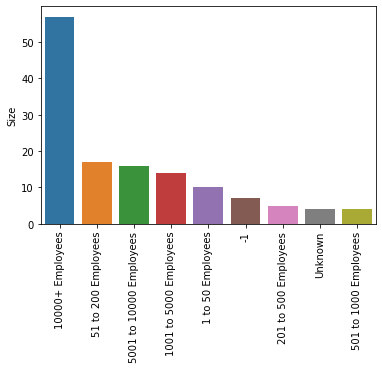

graph for Type_Of_Ownership: total = 9


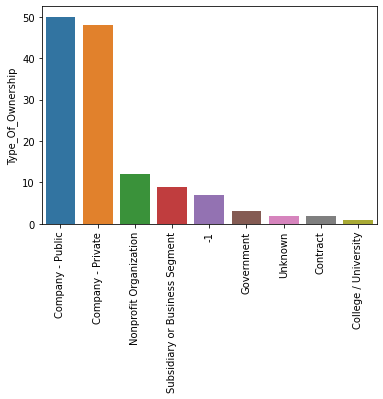

graph for Industry: total = 20


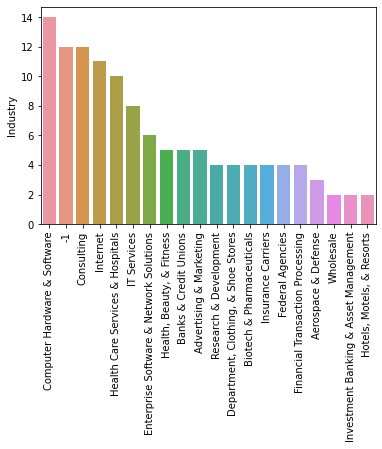

graph for Sector: total = 18


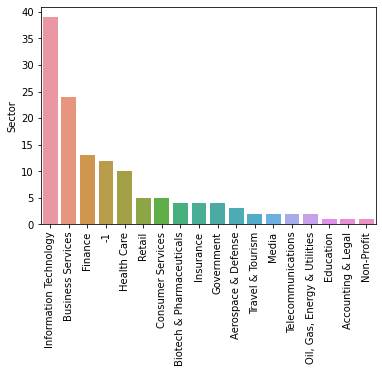

graph for Revenue: total = 14


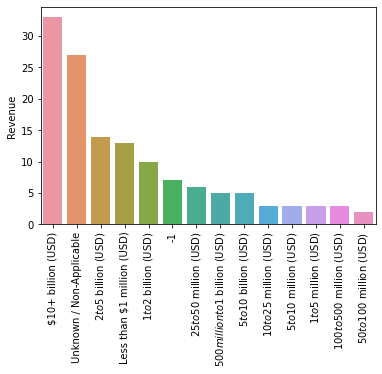

graph for Company_Name: total = 20


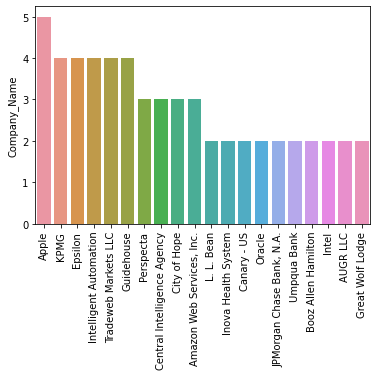

graph for job_state: total = 20


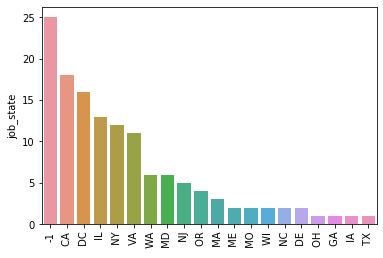

graph for python_jd: total = 2


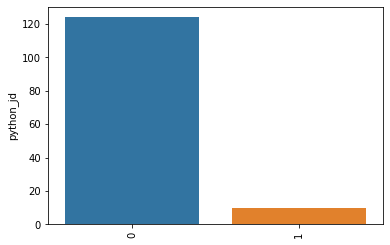

graph for spark_jd: total = 2


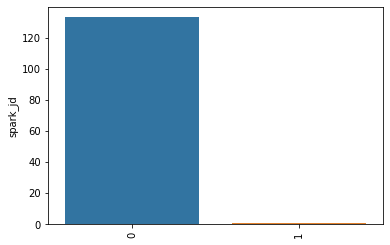

graph for aws: total = 2


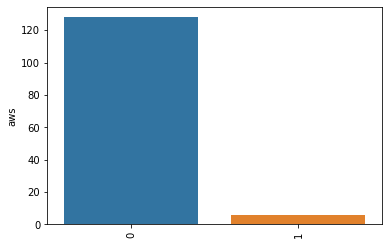

graph for excel: total = 2


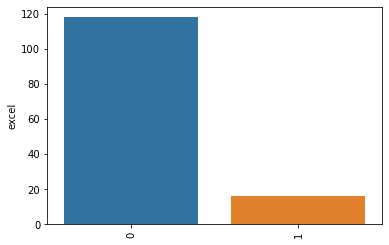

graph for job_simp: total = 3


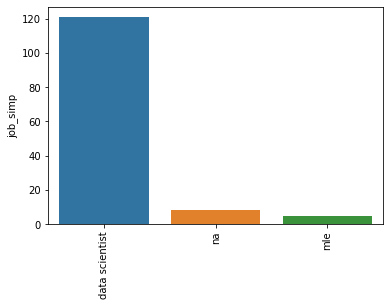

graph for seniority: total = 3


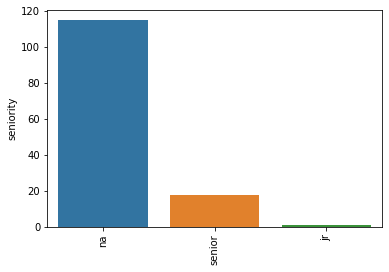

In [44]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [42]:
df.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_Of_Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'average_salary', 'job_state',
       'age_of_company', 'python_jd', 'spark_jd', 'excel', 'aws', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [45]:
pd.pivot_table(df, index = 'job_simp', values = 'average_salary')

,average_salary
job_simp,
data scientist,106.27686
mle,133.00000
na,125.75000


In [46]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salary')

average_salary
job_simp       seniority                
data scientist jr              75.000000
               na             107.871429
               senior          97.200000
mle            na             133.000000
               senior         133.000000
na             na             120.500000
               senior         141.500000

In [47]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salary').sort_values('job_state', ascending = False)

average_salary
job_state job_simp                      
-1        mle                 133.000000
          data scientist      110.456522
 WI       data scientist      120.500000
 WA       data scientist       75.666667
 VA       na                  134.800000
          data scientist      114.916667
 TX       data scientist       57.500000
 PA       data scientist      133.000000
 OR       data scientist       97.375000
 OH       data scientist       91.000000
 NY       mle                 133.000000
          data scientist      104.045455
 NJ       data scientist       97.800000
 NC       data scientist      120.500000
 MO       data scientist      133.000000
 ME       data scientist      120.500000
 MD       mle                 133.000000
          data scientist      119.700000
 MA       data scientist      124.666667
 IL       mle                 133.000000
          data scientist       88.541667
 IA       data scientist      133.000000
 GA       data scientist      150.000000
 DE       data scientist      111.500000
 DC       na                  120.500000
          data scientist      106.392857
 CA       na                   91.000000
          data scientist      108.911765

In [49]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [50]:

pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

average_salary
job_state job_simp                      
-1        mle                          2
          data scientist              23
 WI       data scientist               2
 WA       data scientist               6
 VA       na                           5
          data scientist               6
 TX       data scientist               1
 PA       data scientist               1
 OR       data scientist               4
 OH       data scientist               1
 NY       mle                          1
          data scientist              11
 NJ       data scientist               5
 NC       data scientist               2
 MO       data scientist               2
 ME       data scientist               2
 MD       mle                          1
          data scientist               5
 MA       data scientist               3
 IL       mle                          1
          data scientist              12
 IA       data scientist               1
 GA       data scientist               1
 DE       data scientist               2
 DC       na                           2
          data scientist              14
 CA       na                           1
          data scientist              17

In [52]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
job_state,
GA,150.000000
PA,133.000000
IA,133.000000
MO,133.000000
MA,124.666667
NC,120.500000
WI,120.500000
ME,120.500000
MD,119.700000


In [53]:
df.columns


Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_Of_Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'average_salary', 'job_state',
       'age_of_company', 'python_jd', 'spark_jd', 'excel', 'aws', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [56]:

df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue',  'Hourly',  'python_jd',  'aws', 'excel', 'Type_Of_Ownership','average_salary']]

In [57]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
 4.7        205.333333
 3.4        150.000000
 3.2        133.000000
 4.6        133.000000
 3.7        120.500000
 2.5        120.500000
 3.1        119.166667
-1.0        115.500000
 3.8        112.833333
 4.5        112.714286
 4.1        110.285714
 3.3        107.833333
 4.0        103.750000
 3.5         99.500000
 4.2         99.333333
 3.6         98.857143
 5.0         97.166667
 3.9         96.846154
 4.3         87.700000
 4.4         70.000000
Industry
                                          average_salary
Industry                                                
Insurance Carriers                            172.625000
Staffing & Outsourcing                        150.000000
Cable, Internet & Telephone Providers         150.000000
Energy                                        150.000000
Enterprise Software & Network Solutions       134.500000
Legal                                         133.000000
Colleges & Universitie

ValueError: Grouper for 'average_salary' not 1-dimensional

In [58]:

pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_jd', values = 'average_salary', aggfunc = 'count')

python_jd,0,1
Revenue,,
$1 to $2 billion (USD),10.0,NaN
$1 to $5 million (USD),3.0,NaN
$10 to $25 million (USD),3.0,NaN
$10+ billion (USD),27.0,6.0
$100 to $500 million (USD),3.0,NaN
$2 to $5 billion (USD),14.0,NaN
$25 to $50 million (USD),6.0,NaN
$5 to $10 billion (USD),5.0,NaN
$5 to $10 million (USD),3.0,NaN


In [60]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [61]:
words = " ".join(df['Job_Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'stopwords' is not defined